In [ ]:
#Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the training dataset
training_data = pd.read_csv('/content/train.csv')

In [ ]:
# Display the first few rows of the training dataset
print("Training Data:")
training_data.head()

Training Data:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Load the testing dataset
testing_data = pd.read_csv('/content/test.csv')

In [ ]:
# Display the first few rows of the testing dataset
print("\nTesting Data:")
testing_data.head()


Testing Data:


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
# Summary statistics of numerical columns in training data
print("\nTraining Data Summary:")
print(training_data.describe())


Training Data Summary:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  

In [ ]:
# Check for missing values in training data
print("\nTraining Data Missing Values:")
print(training_data.isnull().sum())


Training Data Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


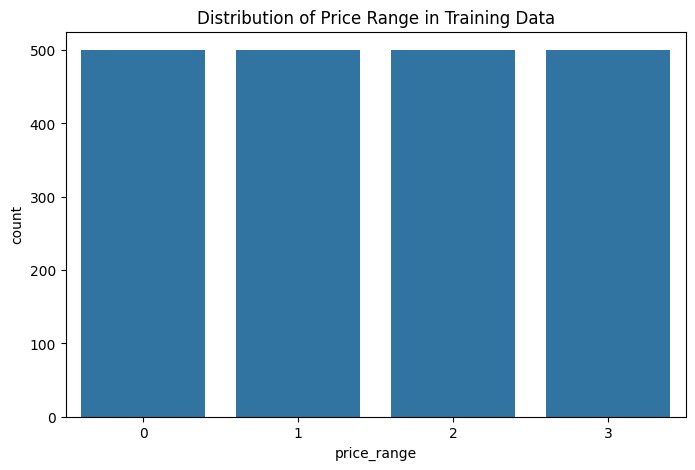

In [ ]:
# Visualize the distribution of the target variable in training data
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=training_data)
plt.title('Distribution of Price Range in Training Data')
plt.show()

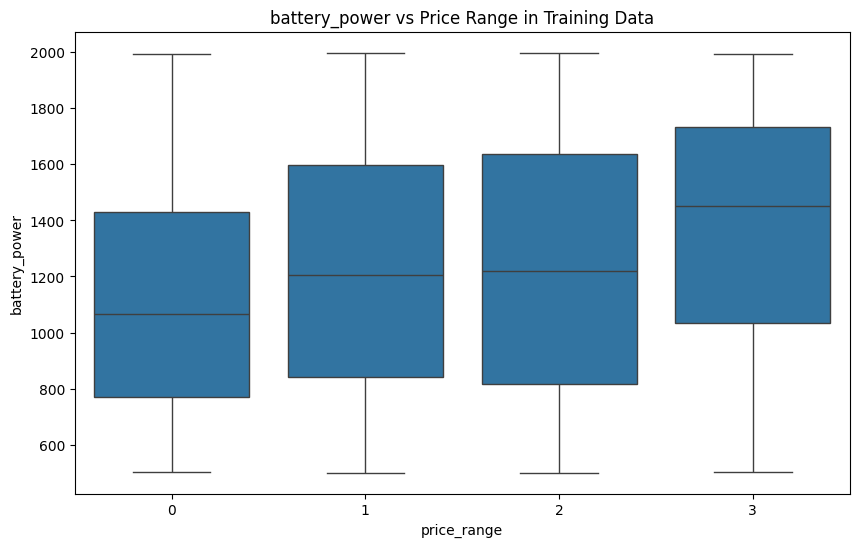

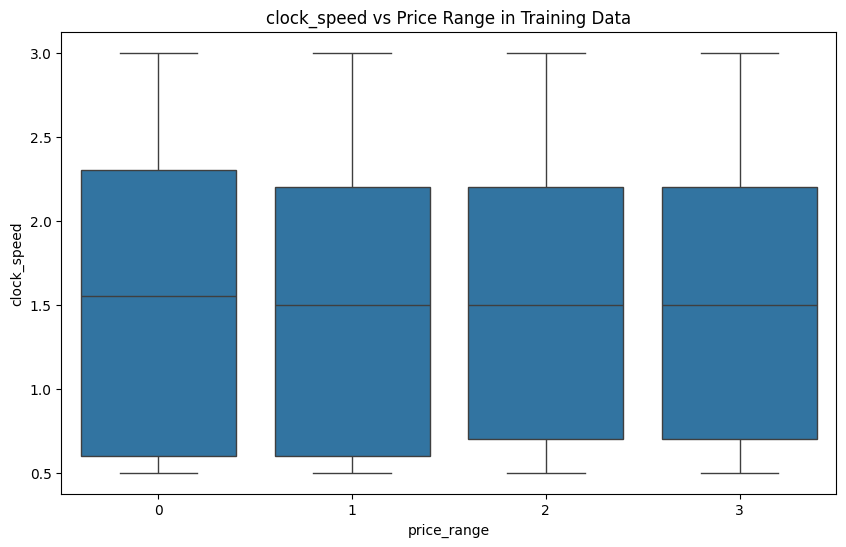

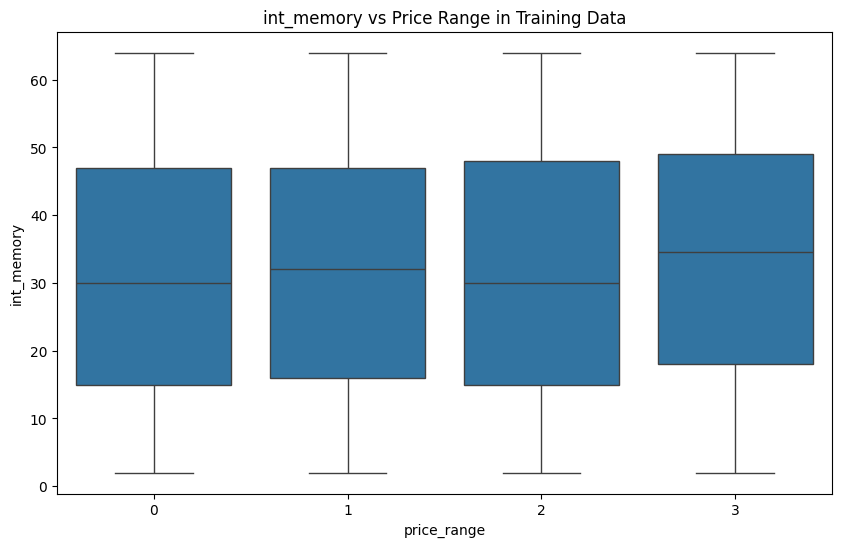

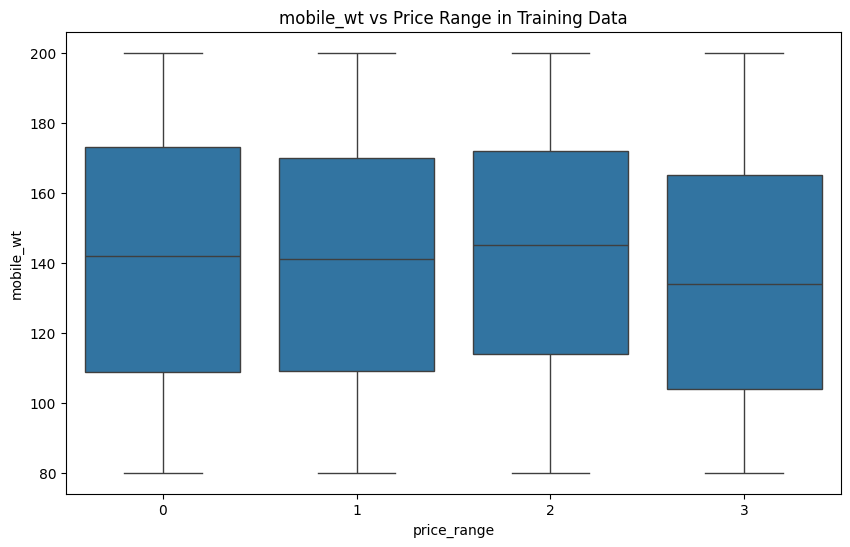

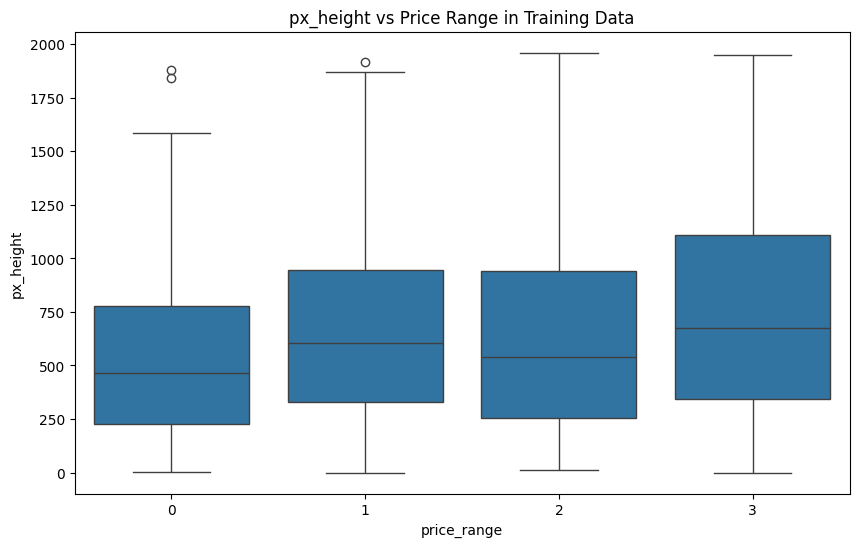

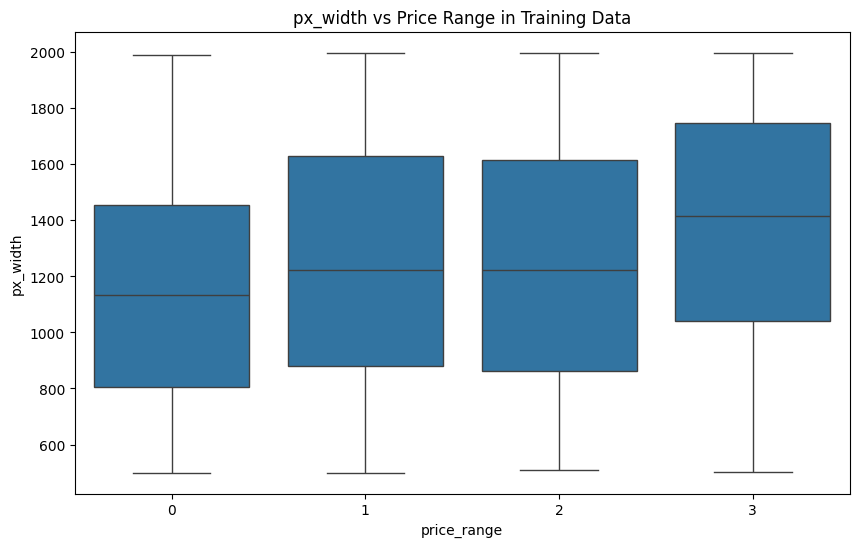

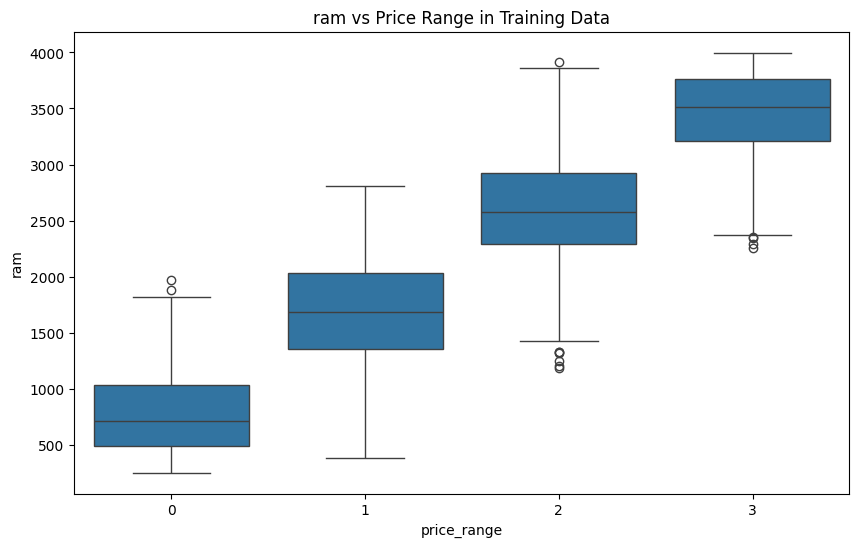

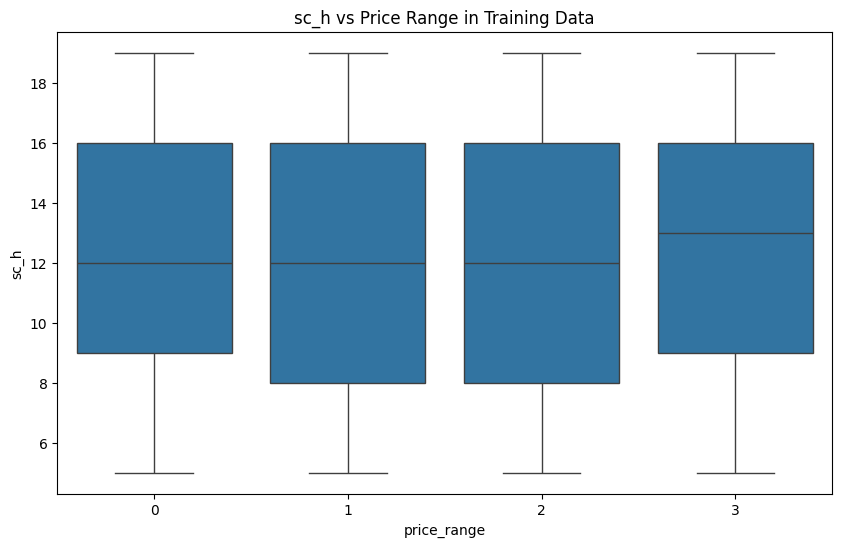

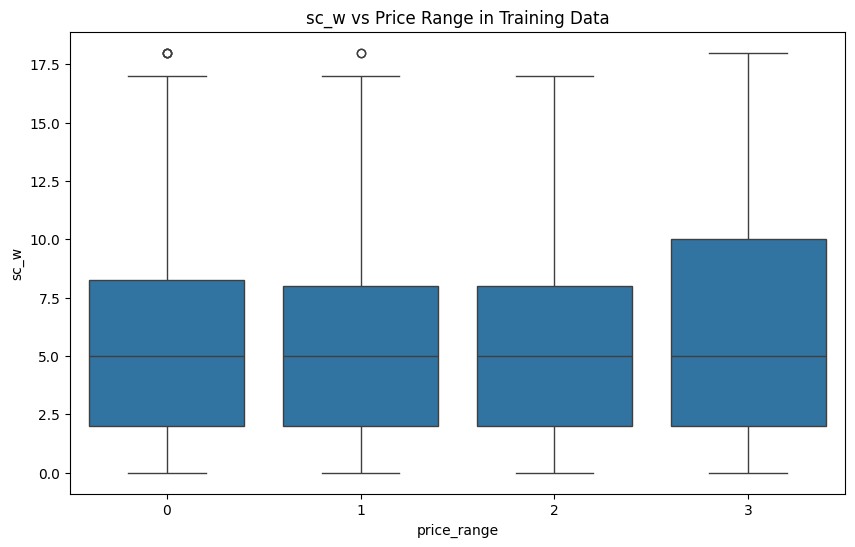

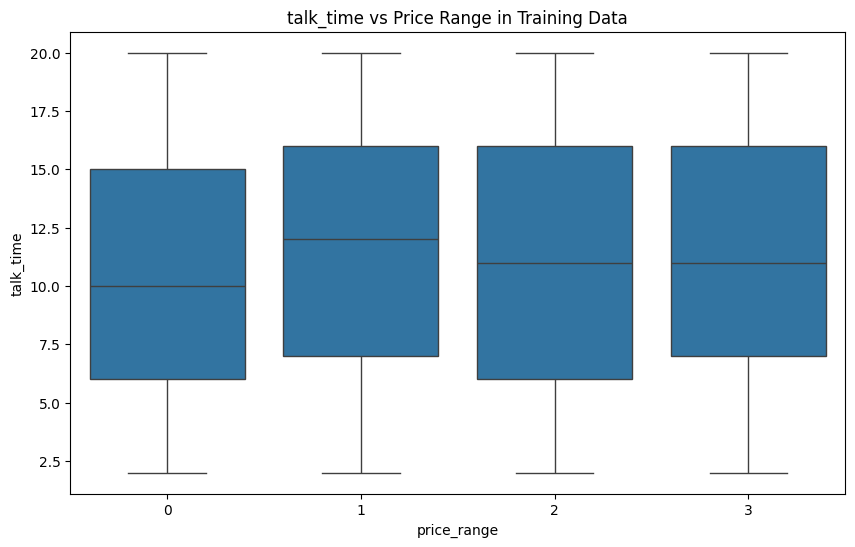

In [ ]:
# Explore the relationship between features and the target variable in training data
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='price_range', y=feature, data=training_data)
    plt.title(f'{feature} vs Price Range in Training Data')
    plt.show()

In [ ]:
# Separate features and target for training data
X_train = training_data.drop('price_range', axis=1)  # Features
y_train = training_data['price_range']  # Target

In [ ]:
# Separate features for testing data
X_test = testing_data.drop('id', axis=1)  # Exclude 'id' column from features

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
dt_predictions = dt_classifier.predict(X_test)

In [ ]:
# Load the 'id' column from testing data for result presentation
result_df = pd.DataFrame({'id': testing_data['id'], 'predicted_price_range': dt_predictions})

In [ ]:
# Display the result
print("\nDecision Tree Classifier Results:")
print(result_df)


Decision Tree Classifier Results:
       id  predicted_price_range
0       1                      3
1       2                      3
2       3                      2
3       4                      3
4       5                      1
..    ...                    ...
995   996                      2
996   997                      1
997   998                      1
998   999                      2
999  1000                      2

[1000 rows x 2 columns]


In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Predictions
svm_predictions = svm_classifier.predict(X_test)

In [ ]:
# Load the 'id' column from testing data for result presentation
result_df_svm = pd.DataFrame({'id': testing_data['id'], 'predicted_price_range': svm_predictions})

In [ ]:
# Display the result
print("\nSVM Classifier Results:")
print(result_df_svm)


SVM Classifier Results:
       id  predicted_price_range
0       1                      3
1       2                      3
2       3                      2
3       4                      3
4       5                      1
..    ...                    ...
995   996                      2
996   997                      1
997   998                      0
998   999                      2
999  1000                      2

[1000 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'price_range' is the target variable in your dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions
dt_predictions = dt_classifier.predict(X_test)


In [ ]:
# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.8325


**Accuracy:**

The accuracy of the Decision Tree Classifier is a measure of the model's overall correctness in predicting the target variable.
Output: "Decision Tree Accuracy: 0.8325

In [ ]:
dt_classification_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classification Report:")
print(dt_classification_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.70      0.74        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



**Classification Report:**

The classification report provides precision, recall, and F1-score for each class.
Precision: The ability of the classifier not to label as positive a sample that is negative.
Recall: The ability of the classifier to find all the positive samples.
F1-score: The weighted average of precision and recall.

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)
print(f'Confusion Matrix for Decision Tree:\n{conf_matrix_dt}')

Confusion Matrix for Decision Tree:
[[ 92  13   0   0]
 [ 10  76   5   0]
 [  0  12  64  16]
 [  0   0  11 101]]


The confusion matrix provides information about the true positive, true negative, false positive, and false negative predictions.

SVC(random_state=42)

In [ ]:
# Predictions
svm_predictions = svm_classifier.predict(X_test)

In [ ]:
# Evaluate SVM Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.965


**Accuracy:**

The accuracy of the SVM Classifier is a measure of the model's overall correctness in predicting the target variable.

Output: "SVM Accuracy: 0.965

In [ ]:
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(svm_classification_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



The classification report provides precision, recall, and F1-score for each class.

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
print(f'Confusion Matrix for SVM:\n{conf_matrix_svm}')

Confusion Matrix for SVM:
[[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]


The confusion matrix provides information about the true positive, true negative, false positive, and false negative predictions.

**Classification:**
Classification is a type of supervised machine learning task where the goal is to categorize input data into predefined classes or labels. In this scenario, the target variable is 'price_range,' and the models aim to predict the price range of mobile phones based on various features.

**Decision Tree Classifier:**
A Decision Tree is a tree-like model that makes decisions based on the values of features in the input data. It recursively splits the data based on the features to create a tree structure, and each leaf node represents a class or a decision. The Decision Tree Classifier is trained on the training data to learn the patterns in the features and their relationship to the target variable. It then makes predictions on new, unseen data.

**Support Vector Machine (SVM):**
Support Vector Machine is a powerful algorithm for classification and regression tasks. SVM works by finding a hyperplane that best separates the data into different classes. In the context of classification, SVM aims to find the hyperplane that maximally separates data points belonging to different classes. The Support Vector Machine Classifier is trained on the training data to create this optimal separation and then predicts the classes of new instances.

**Exploratory Data Analysis (EDA):**
EDA is the process of analyzing and visualizing data sets to gain insights into the data's characteristics, distribution, and relationships between variables. It involves generating summary statistics, creating visualizations, and exploring patterns and trends in the data. EDA is crucial before building machine learning models to understand the data and inform feature selection and preprocessing.

**Evaluation Metrics:**

**Accuracy Score:** It measures the proportion of correctly classified instances out of the total instances.

**Classification Report:** Provides precision, recall, and F1-score for each class. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. F1-score is the weighted average of precision and recall.

**Confusion Matrix:** A table that describes the performance of a classification model. It shows the number of true positive, true negative, false positive, and false negative predictions.